### This project aims to develop and evaluate machine learning models for the classification of [describe the dataset or problem domain briefly]. The dataset used in this project contains [describe the features and target variable]. The goal is to predict [describe the target variable or outcome]. 
### By the end of this project, we aim to deliver a robust machine learning model capable of accurately classifying [target variable] based on the input features. This model can be utilized to [describe potential applications or benefits].



#### Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'HR-Employee-Attrition.csv' dataset and store it inside a variable

In [6]:
df=pd.read_csv('HR-Employee-Attrition.csv')

### Check head

In [3]:
pd.set_option("display.max_columns", None)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Check last 5 rows

In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### Check shape

In [5]:
df.shape

(1470, 35)

### View info about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### View basic statistical information about the dataset

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check for null values

In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### View unique values in all categorical columns

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}: {df[column].unique()}")

Unique values in Attrition: ['Yes' 'No']
Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department: ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender: ['Female' 'Male']
Unique values in JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus: ['Single' 'Married' 'Divorced']
Unique values in Over18: ['Y']
Unique values in OverTime: ['Yes' 'No']


### Check the number of unique values in all columns

In [10]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Print out the names of the columns having only one unique values 

In [12]:
unique_counts = df.nunique()
columns_with_one_unique_value = unique_counts[unique_counts == 1].index.tolist()

print("Columns with only one unique value:")
print(columns_with_one_unique_value)


Columns with only one unique value:
['EmployeeCount', 'Over18', 'StandardHours']


### Drop these columns as they won't be useful in our predicition

In [8]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'],inplace=True)

### Drop EmployeeNumber column aswell

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.drop(columns=['EmployeeNumber'],inplace=True)

### Create following groupby valuecounts

In [16]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5


In [16]:
df.groupby(['Department', 'EducationField'])['Gender'].value_counts()

Department              EducationField    Gender
Human Resources         Human Resources   Male       19
                                          Female      8
                        Life Sciences     Female      9
                                          Male        7
                        Medical           Male       11
                                          Female      2
                        Other             Male        3
                        Technical Degree  Male        3
                                          Female      1
Research & Development  Life Sciences     Male      274
                                          Female    166
                        Medical           Male      211
                                          Female    152
                        Other             Male       39
                                          Female     25
                        Technical Degree  Male       58
                                          Female     36

# <span style = "color: orange"> Data Visualization </span>

### Plot the following

In [17]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


<Axes: xlabel='Attrition', ylabel='count'>

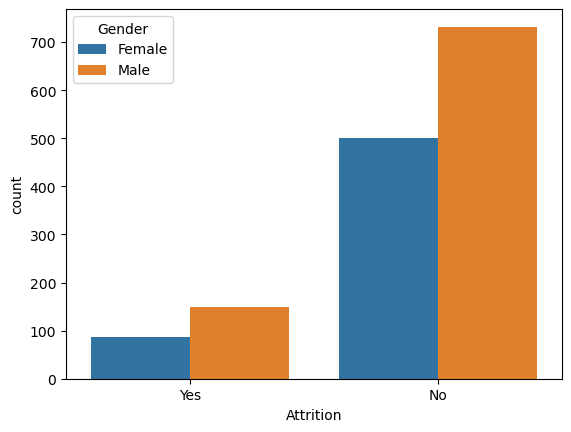

In [19]:
sns.countplot(x=df['Attrition'],hue=df['Gender'])

<Axes: xlabel='BusinessTravel', ylabel='count'>

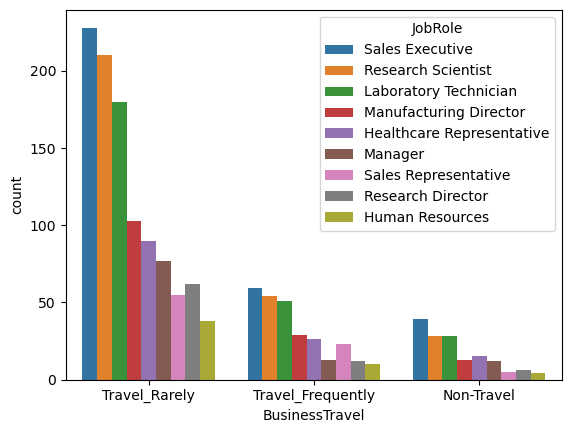

In [20]:
sns.countplot(x=df['BusinessTravel'],hue=df['JobRole'])

<Axes: xlabel='OverTime', ylabel='count'>

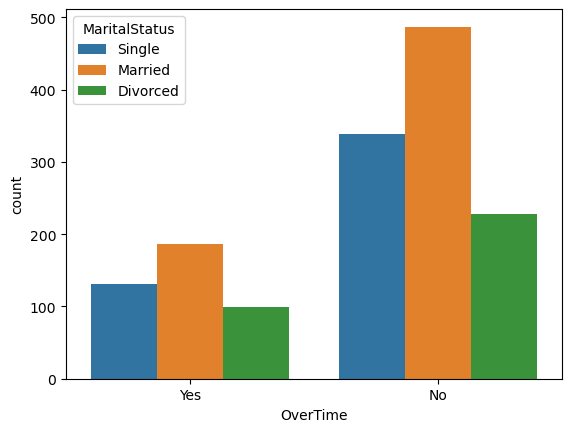

In [21]:
sns.countplot(x=df['OverTime'],hue=df['MaritalStatus'])

<Axes: xlabel='count', ylabel='JobRole'>

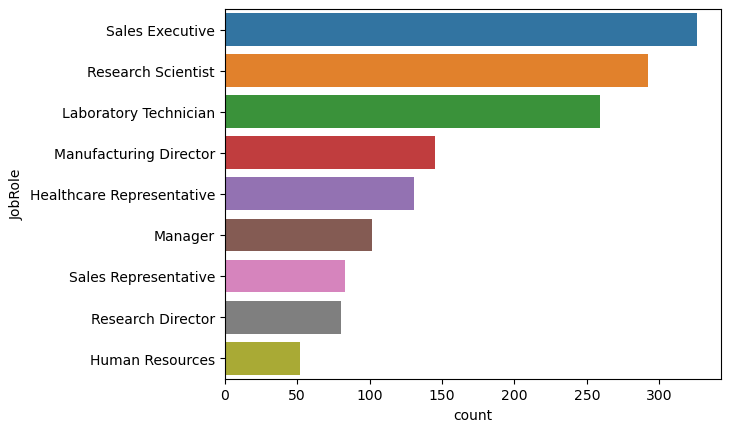

In [22]:
sns.countplot(y=df['JobRole'])

<Axes: xlabel='count', ylabel='Gender'>

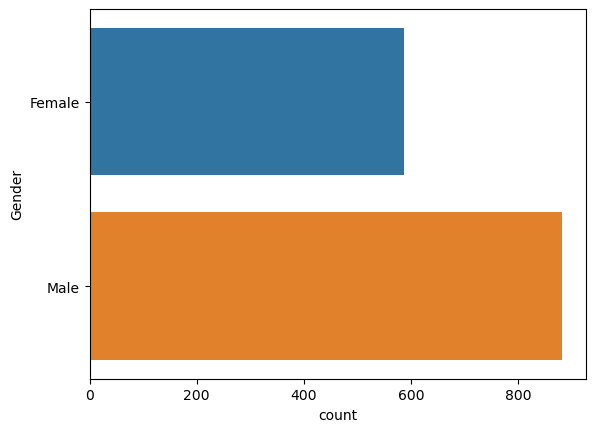

In [24]:
sns.countplot(y=df['Gender'])

<Axes: xlabel='count', ylabel='EducationField'>

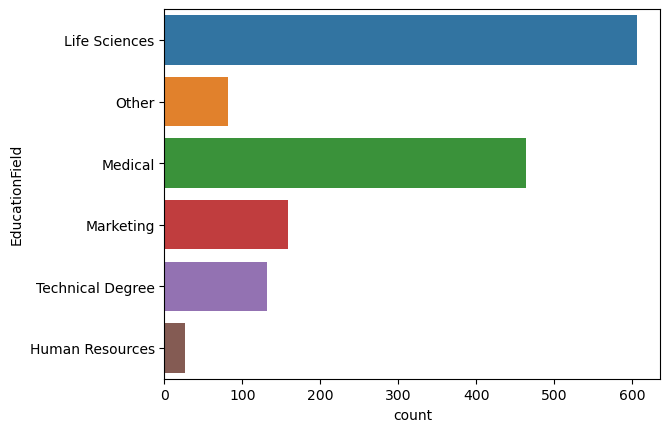

In [26]:
sns.countplot(y=df['EducationField'])

<Axes: xlabel='JobSatisfaction', ylabel='count'>

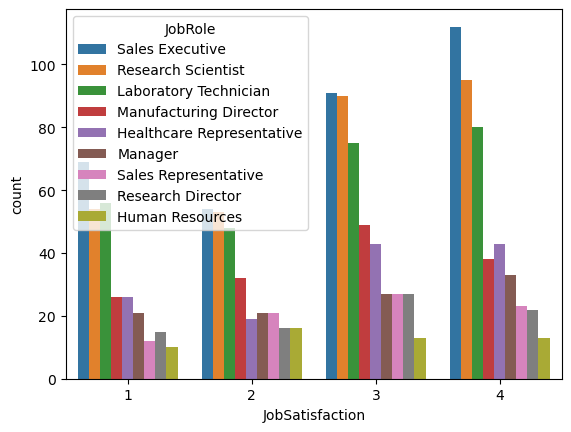

In [29]:
sns.countplot(x=df['JobSatisfaction'],hue=df['JobRole'])

<Axes: xlabel='Age', ylabel='count'>

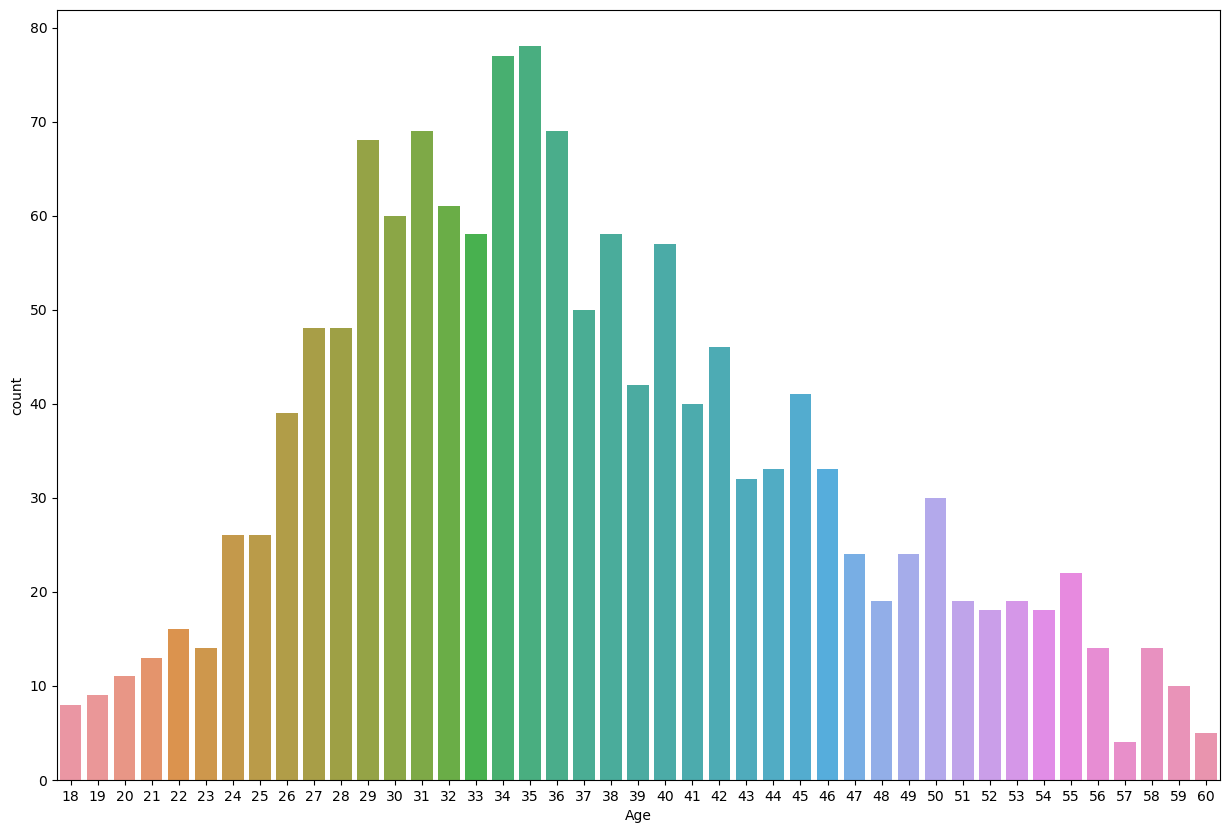

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Age'])

### Data Preprocessing

#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [11]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [48]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


### Convert the rest of the categorical values into numeric using dummy variables and store the results in a new dataframe called 'newdf'

In [12]:
newdf=pd.get_dummies(df,drop_first=True,dtype=int)

In [50]:
newdf

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,0,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,0,155,4,3,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


#### Check the shape of our new dataset

In [13]:
newdf.shape

(1470, 45)

#### Print unique values in our new dataframe

In [14]:
newdf.apply(lambda x: x.unique())

Age                                  [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                                       [1, 0]
DailyRate                            [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
DistanceFromHome                     [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                              [2, 1, 4, 3, 5]
EnvironmentSatisfaction                                                   [2, 3, 4, 1]
HourlyRate                           [94, 61, 92, 56, 40, 79, 81, 67, 44, 84, 49, 3...
JobInvolvement                                                            [3, 2, 4, 1]
JobLevel                                                               [2, 1, 3, 4, 5]
JobSatisfaction                                                           [4, 2, 3, 1]
MonthlyIncome                        [5993, 5130, 2090, 2909, 3468, 3068, 2670, 269...
MonthlyRate                          [19479

#### Split the columns into input and target variables (X and y)

In [15]:
X=newdf.drop(columns=['Attrition'])
y=newdf['Attrition']

#### Carry out Feature scaling using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


### Split the dataset into training and testing set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Machine Learning Models

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [23]:
model=LogisticRegression()

In [24]:
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_predlr=model.predict(X_test)

In [64]:
accuracy_score(y_test,y_predlr)

0.8616780045351474

<span style = "color:orange"> Visualize confusion matrix </span>

In [65]:
confusion_matrix(y_test,y_predlr)

array([[350,  19],
       [ 42,  30]], dtype=int64)

<Axes: >

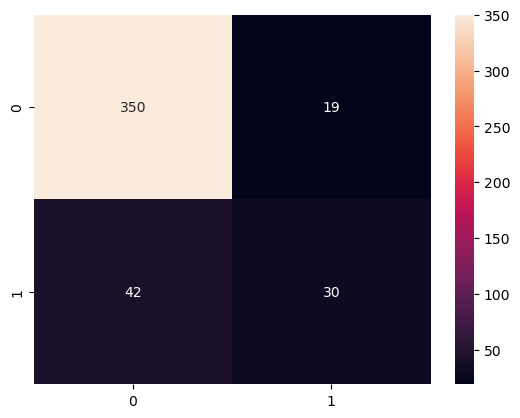

In [66]:
sns.heatmap(confusion_matrix(y_test,y_predlr),annot=True,fmt='d')

### Random Forest Classifier
** Choose the best estimator and parameters :GridSearchCV**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [67]:
modelrfc=RandomForestClassifier()

In [68]:
modelrfc.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_predrf=modelrfc.predict(X_test)

In [30]:
params={'max_depth': [0.5, 1, 5, 10],'n_estimators': [16, 32, 50, 100],'n_jobs': [1, 2],'random_state': [1, 10, 20, 42]}

In [31]:
gsv=GridSearchCV(RandomForestClassifier(),params,scoring='accuracy')

In [32]:
gsv.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sk

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]},
             scoring='accuracy')

In [33]:
gsv.score(X_train,y_train)

0.9834791059280855

<span style = "color:blue"> Create Random forest model with the best parameters </span>

In [34]:
gsv.best_params_

{'max_depth': 10, 'n_estimators': 100, 'n_jobs': 1, 'random_state': 1}

In [35]:
gsv.best_score_

0.858115084063462

<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

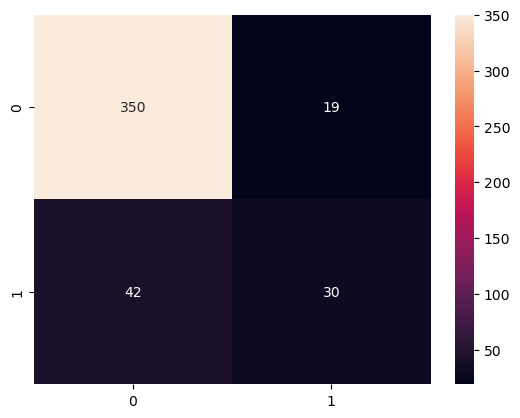

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Support Vector Machine

In [36]:
from sklearn.svm import SVC
params={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [37]:
gsv1=GridSearchCV(SVC(),params,scoring='accuracy')

In [70]:
modelsvm=SVC()

In [71]:
modelsvm.fit(X_train,y_train)

SVC()

In [72]:
y_predsvm=modelsvm.predict(X_test)

In [38]:
gsv1.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [45]:
print('Best estimator is:',gsv1.best_estimator_)
print('Best parameters is:',gsv1.best_params_)
print('Best score is:',gsv1.best_score_)

Best estimator is: SVC(C=0.95, kernel='linear')
Best parameters is: {'C': 0.95, 'degree': 3, 'kernel': 'linear'}
Best score is: 0.8901918067724367


In [48]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Confusion Metrics:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

Accuracy score is: 0.8616780045351474
Confusion Metrics: [[350  19]
 [ 42  30]]
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.95      0.92       369
           1       0.61      0.42      0.50        72

    accuracy                           0.86       441
   macro avg       0.75      0.68      0.71       441
weighted avg       0.85      0.86      0.85       441



<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

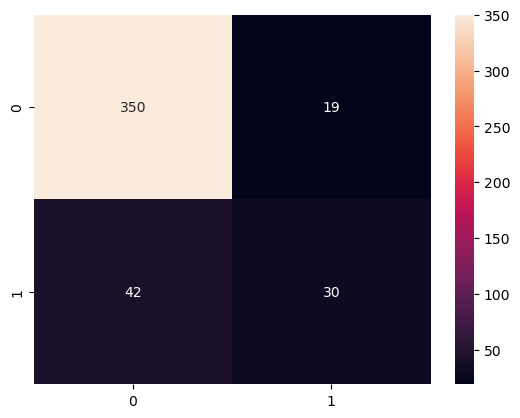

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### AdaBoost: Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
modelada = AdaBoostClassifier(random_state=50)
modelada.fit(X_train, y_train)

AdaBoostClassifier(random_state=50)

In [74]:
y_predada=modelada.predict(X_test)

In [57]:
print("Accuracy score is:", accuracy_score(y_test, y_pred))
print("Confusion metrics:", confusion_matrix(y_test,y_pred))
print("Classification Report:", classification_report(y_test,y_pred))

Accuracy score is: 0.8684807256235828
Confusion metrics: [[354  15]
 [ 43  29]]
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.96      0.92       369
           1       0.66      0.40      0.50        72

    accuracy                           0.87       441
   macro avg       0.78      0.68      0.71       441
weighted avg       0.85      0.87      0.86       441



<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

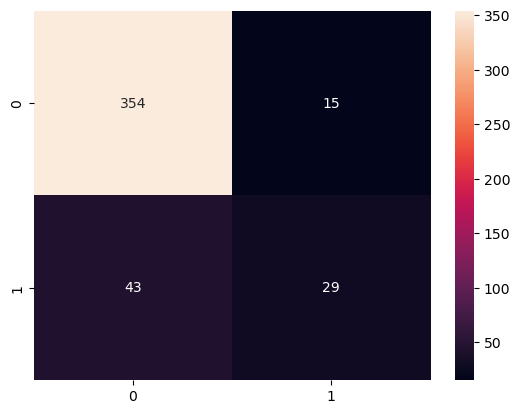

In [58]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### View score of different models in one dataframe

In [82]:
import pandas as pd

scores = {'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'AdaBoost'],
    'Accuracy': [accuracy_score(y_test, y_predlr),accuracy_score(y_test, y_predrf),accuracy_score(y_test, y_predsvm),accuracy_score(y_test, y_predada)]}

pd.DataFrame(scores)




,Model,Accuracy
0,Logistic Regression,0.857143
1,Random Forest,0.857143
2,Support Vector Machine,0.854875
3,AdaBoost,0.868481


## Use PCA to reduce dimensionality of the data

#### Import PCA and fit our X_train

In [85]:
from sklearn.decomposition import PCA

In [86]:
pca=PCA(n_components=0.95)

In [91]:
x_pca=pd.DataFrame(pca.fit_transform(X_train))

In [88]:
x_pca

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.758036,2.187958,-0.411593,-1.512814,-0.948691,-0.451774,-2.070018,-0.532527,-0.195066,0.120356,...,1.332091,0.076808,0.341716,-0.353995,-0.076856,-0.173662,0.038844,-0.979996,0.839431,-0.902757
1,4.339547,-1.841134,0.361406,0.272966,0.339956,-1.630174,1.998460,-1.342685,-0.651489,-0.458604,...,0.637555,0.012494,0.955390,-0.423964,1.162361,0.198516,-0.581032,1.281952,-0.516197,0.510967
2,-0.266840,3.596233,-0.418577,-1.249969,0.449544,2.139694,0.701639,2.218846,-0.469434,-0.527554,...,-0.596191,0.567801,-0.099685,-1.211493,-0.245669,0.504791,-1.826091,0.127191,-0.395504,-0.582235
3,-1.818334,-1.369325,-2.716935,0.305104,0.425040,-0.482063,0.850498,2.135352,-0.059696,-0.460159,...,0.343993,-0.524880,-2.130305,2.168599,-0.213905,0.447211,-0.309864,-0.529585,-0.570805,0.599022
4,-2.587776,-0.809771,1.693600,1.030700,-0.187130,-1.161310,0.751994,1.546416,1.142083,-0.175944,...,1.268018,-0.863682,0.632562,0.050706,-1.989657,0.040394,-1.596393,-0.125050,0.075032,0.323597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0.629164,2.134285,1.678745,1.553823,0.541993,3.720776,0.283517,0.401716,-0.399750,-0.758116,...,0.201814,-1.009740,2.092986,-0.197585,-0.219366,0.196655,2.403134,-0.326545,-0.188838,1.298175
1025,-3.558277,-0.583851,1.306023,0.810498,0.227789,-1.571284,-0.355548,-1.021210,0.953948,0.037504,...,0.712417,0.690656,0.013206,-2.307947,0.091150,-0.953472,-0.326314,-0.014248,1.168748,-0.286837
1026,-3.067595,1.096303,-1.712720,-0.062036,-1.843127,-0.647365,1.335639,-2.843355,3.140782,1.518383,...,0.285793,-0.673469,-0.429387,0.232966,-0.244629,1.472785,0.225946,0.303086,-0.245611,-0.357205
1027,2.642664,2.014233,0.652561,-0.658227,-1.283912,-1.515425,0.437076,-0.063517,-0.656687,-0.663452,...,1.729879,-0.796915,0.644216,0.931141,-0.584840,0.554618,-1.594156,-1.944242,0.913483,-0.686239


#### Apply the mapping (transform) to both the training set and the test set.

In [92]:
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

#### Import machine learning model of our choice, we are going with RandomForest for this problem

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
modelr=RandomForestClassifier()

In [98]:
modelr.fit(X_train,y_train)

RandomForestClassifier()

#### Create RandomForest model with the best parameter we got earlier and train it

In [99]:
params={'max_depth': 10,'n_estimators': 32,'n_jobs': 1,'random_state': 20}

In [100]:
gsv=GridSearchCV(RandomForestClassifier(),params,scoring='accuracy')

#### Check the score of our model

In [101]:
modelr.score(X_train,y_train)

1.0

#### Make predictions with X_test and check the accuracy score

In [104]:
y_predr=modelr.predict(X_test)
accuracy_score(y_test,y_predr)

0.8639455782312925

### Print Confusion matrix and Classification report

In [105]:
confusion_matrix(y_test,y_predr)

array([[368,   1],
       [ 59,  13]], dtype=int64)

In [106]:
classification_report(y_test,y_predr)

'              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.92       369\n           1       0.93      0.18      0.30        72\n\n    accuracy                           0.86       441\n   macro avg       0.90      0.59      0.61       441\nweighted avg       0.87      0.86      0.82       441\n'